# Fake News Prediction

#### EG/2020/3922 - Ekanayake E.M.S.D.
#### EG/2020/3918 - Diyunugala D.T.N

In [2]:
import numpy as np 
import pandas as pd 
import re # regular expression for searching text in the document 
import nltk
from nltk.corpus import stopwords # body of text natural language; stopwords are words that not much value by this function it will remove all the stopwords.
from nltk.stem.porter import PorterStemmer #for performing function of stemming
from sklearn.feature_extraction.text import TfidfVectorizer #for conver text into feature vectors that means numbers
from sklearn.model_selection import train_test_split #  data into train data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve , roc_auc_score , confusion_matrix

#### Data Preprocessing

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shavidika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english')) #printing the stopwords in English

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('./Data/train.csv')

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
# print the first 5 rows of the dataframe
news_dataset.head()
# 1 represents the fake news and 0 : the real news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


c:\Users\Shavidika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shavidika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shavidika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


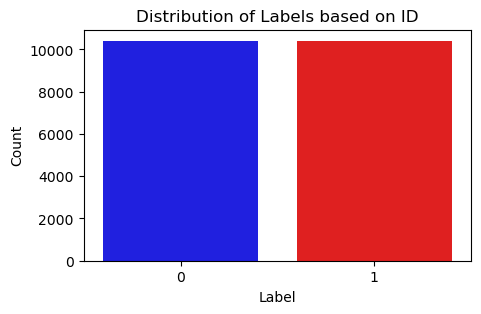

In [8]:
# Plotting the bar plot
plt.figure(figsize=(5, 3))
sns.countplot(x='label', data=news_dataset, dodge=True, palette=['blue','red'])
plt.title('Distribution of Labels based on ID')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


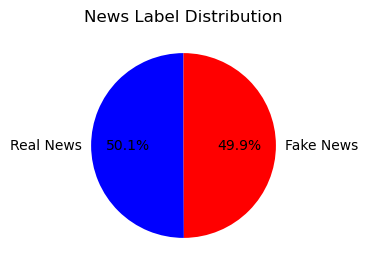

In [9]:
# Pie chart
plt.figure(figsize=(5, 3))
labels = ['Real News', 'Fake News']
colors = ['blue', 'red']

plt.pie(news_dataset['label'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('News Label Distribution')
plt.show()

In [14]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

<Axes: >

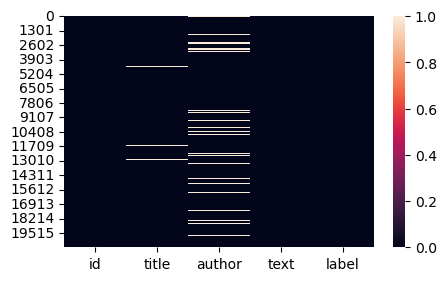

In [15]:
# draw heatmap of null values
plt.figure(figsize=(5, 3))
sns.heatmap(data = news_dataset .isnull())

In [16]:
# replacing the null values with empty strings
news_dataset = news_dataset.fillna('')

<Axes: >

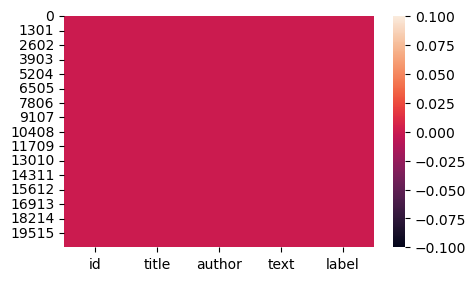

In [17]:
# draw heatmap of null values
plt.figure(figsize=(5, 3))
sns.heatmap(data = news_dataset .isnull())

In [18]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author'] +' '+news_dataset['title']

In [19]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [20]:
#seperating the data & lables ; axis =1 use to remove a column
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [21]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

##### Stemming:

Stemming is the process of reducing a word to its Root word
example:
actor,actress, acting --> act

In [22]:
port_stem = PorterStemmer()

In [23]:
# stemming data 
def stemming(content): #creating function named stemming
    stemmed_content = re.sub('[^a-zA-Z]',' ',content ) # for searching substitute certain value 
    # ^:exclusion a-zA-Z :all alparbets; all the numbers and functuation will be removed

    # convert all alphabet in to lower case
    stemmed_content = stemmed_content.lower()

    # all words convert to a list
    stemmed_content = stemmed_content.split()

    # taking a word and reducing in to a root word exept the stopwords. removing stopwords ; for loop is used to pass in the dataframe  
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

    # joining all the words
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [24]:
# applying above functiion to the content
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [25]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [26]:
 # seperating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [27]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [28]:
print(Y)

[1 0 1 ... 0 1 1]


In [29]:
Y.shape

(20800,)

In [30]:
 # converting the textual data into numerical data
vectorizer = TfidfVectorizer() 
# tf : term frequency ; number of  repeated significant words and give them particular value
# idf : inverse document frequency ; count number of times particular word,text or paragraph is repeating in a document
# reputation : give particular numerical value to special word

vectorizer.fit(X)

X = vectorizer.transform(X)

In [31]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

#### Splitting dataset to training and test data

In [32]:
# spliting into two datasets x_train and x_test; 80% to training and 20% to testing 
# label for x_train is y_train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

#### Functions

In [33]:
# these functions are used in future steps.
# train the model
def train(model , model_name):
    model.fit(X_train,Y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,Y_train)}")
    print(f"Testing accuracy of {model_name} is {model.score(X_test,Y_test)}")


# create confusion metrix
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
    )
    
# print a summery of the model
def class_report(model):
    print(classification_report(
        Y_test,
        model.predict(X_test)
    ))

### Logistic Regression

In [34]:
model_lr = LogisticRegression()

In [35]:
train(model_lr, 'LogisticRegression')

Training accuracy of LogisticRegression is 0.9865985576923076
Testing accuracy of LogisticRegression is 0.9790865384615385


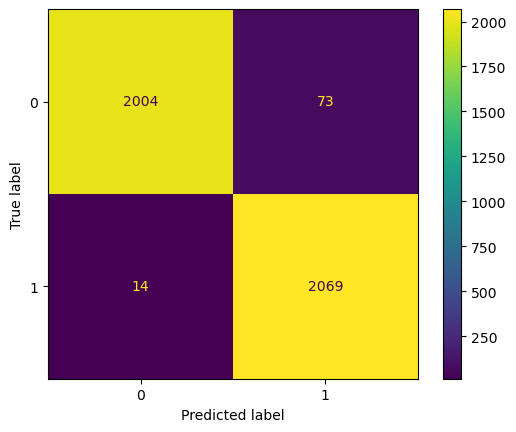

In [37]:
conf_matrix(model_lr)

In [38]:
class_report(model_lr)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



#### Evaluation


Making a Predictive System


In [54]:
# checking whether new news predict correctly

import pandas as pd

def check(id):
    tempNews = X_test[id, :]  # Assuming X_test is a csr_matrix
    tempNews_dense = tempNews.toarray()  # Convert to a dense matrix or DataFrame
    prediction = model_lr.predict(tempNews_dense.reshape(1, -1))
    
    news = news_dataset.iloc[id]

    if prediction[0] == 0:
        print(f"\n\nNews no : {id} is a real news.")
    else:
        print(f"\n\nNews no : {id} is a fake news.")
    
    # Convert the news to a DataFrame and print it
    news_df = pd.DataFrame(news).transpose()
    print(f"\n\n{news_df}")

check(0)




News no:0 is a fake news.


  id                                              title         author  \
0  0  House Dem Aide: We Didn’t Even See Comey’s Let...  Darrell Lucus   

                                                text label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...     1   

                                             content  
0  darrel lucu hous dem aid even see comey letter...  


In [55]:
# checking whether prediction is correct or not
# If fake news output sould be 1
# If true news output sould be 0
print(Y_test[0])

1


### DecisionTreeClassifier

In [39]:
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,Y_train)
    training_acc.append(tree_model.score(X_train,Y_train))
    testing_acc.append(tree_model.score(X_test,Y_test))

In [40]:
print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9962139423076923, 0.9966947115384616, 0.9971153846153846]
testing Accuracy Scores: [0.9901442307692307, 0.9899038461538462, 0.9908653846153846]


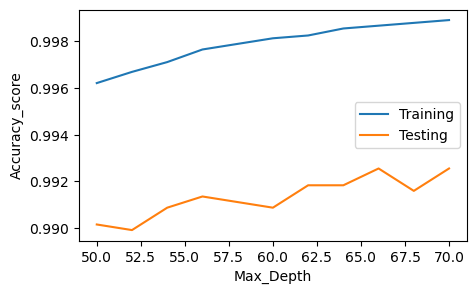

In [41]:
plt.figure(figsize=(5, 3))
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend()

In [42]:
tree_final_model=DecisionTreeClassifier(max_depth=58,random_state=42)
tree_final_model.fit(X_train,Y_train)
tree_training_acc = tree_final_model.score(X_train,Y_train)
tree_testing_acc = tree_final_model.score(X_test,Y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9978966346153846
testing accuracy of DesicionTreeClassifier is 0.9911057692307692


<Figure size 500x300 with 0 Axes>

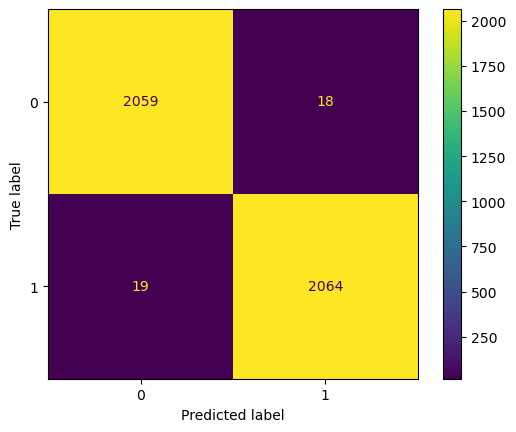

In [43]:
plt.figure(figsize=(5, 3))
conf_matrix(tree_final_model)

In [44]:
class_report(tree_final_model)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



#### Evaluation


Making a Predictive System


In [56]:
# checking whether new news predict correctly

import pandas as pd

def check(id):
    tempNews = X_test[id, :]  # Assuming X_test is a csr_matrix
    tempNews_dense = tempNews.toarray()  # Convert to a dense matrix or DataFrame
    prediction = tree_final_model.predict(tempNews_dense.reshape(1, -1))
    
    news = news_dataset.iloc[id]

    if prediction[0] == 0:
        print(f"\n\nNews no : {id} is a real news.")
    else:
        print(f"\n\nNews no : {id} is a fake news.")
    
    # Convert the news to a DataFrame and print it
    news_df = pd.DataFrame(news).transpose()
    print(f"\n\n{news_df}")

check(0)




News no : 0 is a fake news.


  id                                              title         author  \
0  0  House Dem Aide: We Didn’t Even See Comey’s Let...  Darrell Lucus   

                                                text label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...     1   

                                             content  
0  darrel lucu hous dem aid even see comey letter...  


In [57]:
# checking whether prediction is correct or not
# If fake news output sould be 1
# If true news output sould be 0
print(Y_test[0])

1


### Results

In [58]:
models = pd.DataFrame({
    
    "Models": ["Logestic Regression" , "DecisionTreeClassifier"],
    "Score":[model_lr.score(X_test,Y_test) ,tree_testing_acc ]
    
})
models.sort_values(by="Score" , ascending=False)

,Models,Score
1,DecisionTreeClassifier,0.991106
0,Logestic Regression,0.979087


c:\Users\Shavidika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shavidika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shavidika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


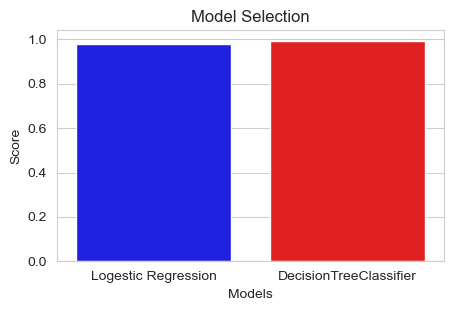

In [59]:
colors= ['blue','red']
sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show()

#### The DecisionTreeClassifier model has a higher accuracy rate.